In [9]:
import pandas as pd

df = pd.read_csv('dados_refinados.csv')

In [10]:
df.head()

,segmento,codigo_bovespa,nome_acao,nome_tipo_acao,percentual_participacao_acao,percentual_participacao_acumulada,quantidade_teorica,ano,mes,dia,data_pregao
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,3.003,3.003,1.482106e+09,2025,7,22,2025-07-22
1,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,2.981,2.981,1.482106e+09,2025,7,18,2025-07-18
2,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,2.496,2.761,7.346317e+08,2025,7,18,2025-07-18
3,Bens Indls / Mat Transporte,POMO4,MARCOPOLO,PN N2,0.265,2.761,6.663784e+08,2025,7,18,2025-07-18
4,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,2.416,2.681,7.346317e+08,2025,7,22,2025-07-22


### Qual os dias considerados?

In [11]:
unique_dates = df['data_pregao'].unique().tolist()
unique_dates.sort()
display(unique_dates)

['2025-07-18',
 '2025-07-19',
 '2025-07-20',
 '2025-07-21',
 '2025-07-22',
 '2025-07-23',
 '2025-07-24',
 '2025-07-25',
 '2025-07-26']

### Quantas ações tem em cada dia?

In [12]:
actions_per_day = df['data_pregao'].value_counts()
display(actions_per_day)

,count
data_pregao,
2025-07-22,84
2025-07-18,84
2025-07-26,84
2025-07-20,84
2025-07-25,84
2025-07-21,84
2025-07-23,84
2025-07-24,84
2025-07-19,84


# Tarefa
Analise o arquivo "dados_refinados.csv" para calcular a média e o desvio padrão de cada ação e, em seguida, gere um gráfico de barras mostrando esses valores em ordem decrescente.

## Calcular média e desvio padrão por ação

### Subtarefa:
Agrupar os dados por 'nome_acao' e calcular a média e o desvio padrão para as colunas numéricas relevantes.

**Raciocínio**:
Selecione as colunas numéricas relevantes, agrupe os dados por 'nome_acao', calcule a média e o desvio padrão das colunas selecionadas e armazene os resultados em um novo DataFrame.

In [13]:
numerical_cols = ['percentual_participacao_acao', 'quantidade_teorica']
stock_stats = df.groupby('nome_acao')[numerical_cols].agg(['mean', 'std'])
display(stock_stats)

percentual_participacao_acao           quantidade_teorica     
                                    mean       std               mean  std
nome_acao                                                                 
ALLOS                           0.496667  0.006576       4.769760e+08  0.0
AMBEV S/A                       2.850333  0.014883       4.394835e+09  0.0
ASSAI                           0.632111  0.007507       1.345898e+09  0.0
AUREN                           0.145000  0.005477       3.237387e+08  0.0
AZZAS 2154                      0.238556  0.002877       1.366433e+08  0.0
...                                  ...       ...                ...  ...
VAMOS                           0.091222  0.001563       4.851668e+08  0.0
VIBRA                           1.098556  0.020329       1.113939e+09  0.0
VIVARA S.A.                     0.150889  0.002205       1.231606e+08  0.0
WEG                             2.886556  0.198425       1.482106e+09  0.0
YDUQS PART                      0.166000  0.005766       2.602491e+08  0.0

[81 rows x 4 columns]

## Preparação de dados para plotagem

### Subtarefa:
Preparar os dados calculados de média e desvio padrão em um formato adequado para plotagem de um gráfico de barras.

**Raciocínio**:
Para preparar os dados para plotagem, primeiro classificarei o DataFrame `stock_stats` pela média de `percentual_participacao_acao` em ordem decrescente, depois selecionarei as 20 principais ações e, por fim, redefinirei o índice para tornar `nome_acao` uma coluna regular. Tudo isso pode ser feito em um único bloco de código.

In [14]:
df_plot = stock_stats.sort_values(by=('percentual_participacao_acao', 'mean'), ascending=False).head(20).reset_index()
display(df_plot)

nome_acao percentual_participacao_acao           quantidade_teorica  \
                                         mean       std               mean   
0           VALE                    11.491778  0.251715       4.270903e+09   
1   ITAUUNIBANCO                     8.098333  0.033298       4.757320e+09   
2      PETROBRAS                     5.677056  1.051317       3.615688e+09   
3         SABESP                     3.644667  0.039354       6.834957e+08   
4             B3                     3.305444  0.044498       5.200055e+09   
5         ITAUSA                     2.966556  0.014630       5.856698e+09   
6            WEG                     2.886556  0.198425       1.482106e+09   
7      AMBEV S/A                     2.850333  0.014883       4.394835e+09   
8         BRASIL                     2.774444  0.032619       2.842614e+09   
9     BTGP BANCO                     2.497556  0.036688       1.287248e+09   
10      BRADESCO                     2.420389  1.504378       3.290374e+09   
11       EMBRAER                     2.414667  0.045957       7.346317e+08   
12    EQUATORIAL                     2.058111  0.010142       1.244305e+09   
13    ELETROBRAS                     1.970111  1.461090       1.038764e+09   
14     REDE D OR                     1.821222  0.011289       1.145289e+09   
15      LOCALIZA                     1.667444  0.016539       9.562647e+08   
16      PETRORIO                     1.613000  0.022444       7.800000e+08   
17   SUZANO S.A.                     1.559444  0.023228       6.308218e+08   
18         ENEVA                     1.269222  0.007429       1.907494e+09   
19  TELEF BRASIL                     1.139667  0.011214       7.648843e+08   

                  
             std  
0   0.000000e+00  
1   0.000000e+00  
2   8.183235e+08  
3   0.000000e+00  
4   0.000000e+00  
5   0.000000e+00  
6   0.000000e+00  
7   0.000000e+00  
8   0.000000e+00  
9   0.000000e+00  
10  1.874111e+09  
11  0.000000e+00  
12  0.000000e+00  
13  7.922086e+08  
14  0.000000e+00  
15  0.000000e+00  
16  0.000000e+00  
17  0.000000e+00  
18  0.000000e+00  
19  0.000000e+00

## Gerar gráfico de barras

### Subtarefa:
Criar um gráfico de barras visualizando a média e o desvio padrão de cada ação, classificados em ordem decrescente.

**Raciocínio**:
Gere um gráfico de barras mostrando a média e o desvio padrão das 20 principais ações por porcentagem de participação.

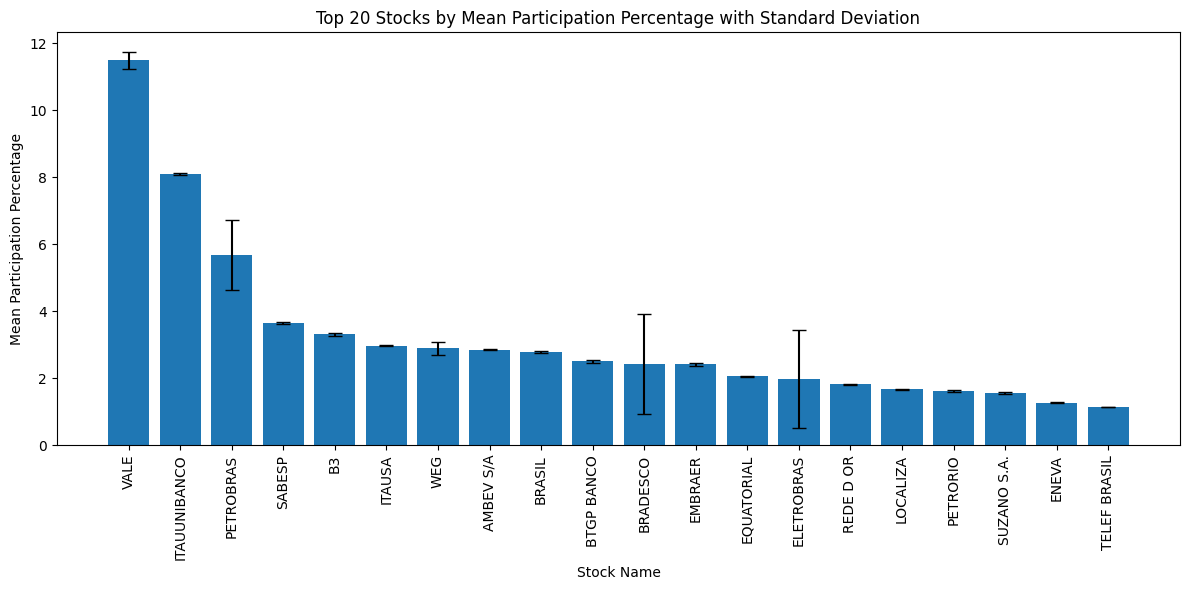

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_plot['nome_acao'], df_plot[('percentual_participacao_acao', 'mean')], yerr=df_plot[('percentual_participacao_acao', 'std')], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Stock Name')
plt.ylabel('Mean Participation Percentage')
plt.title('Top 20 Stocks by Mean Participation Percentage with Standard Deviation')
plt.tight_layout()
plt.show()

## Resumo:

### Principais Resultados da Análise de Dados

* A média e o desvio padrão para 'participação percentual' e 'quantidade' foram calculados para 81 ações diferentes.
* As 20 principais ações foram identificadas com base em sua média de 'participação percentual'.
* Um gráfico de barras visualizando a média de 'participação percentual' para as 20 principais ações foi gerado com sucesso, incluindo barras de erro representando o desvio padrão.

### Insights ou Próximos Passos

* Analise as ações com alta porcentagem média de participação, mas também com alto desvio padrão, para entender a volatilidade de sua representação.
* Investigue as ações que não entraram no top 20 para entender os fatores que contribuem para suas menores porcentagens de participação.